<a href="https://colab.research.google.com/github/lovelyoyrmia/machine-learning-notebook/blob/main/image_preprocessing_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fashion recommender**




## **Load data from kaggle**

In [4]:
import google.colab as gc

In [26]:
gc.files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lovelyomokalu","key":"08e28f946b9abb7e58b1c7c465ea35e5"}'}

In [27]:
! pip install -q kaggle

In [28]:
! mkdir ~/.kaggle

In [29]:
! cp kaggle.json ~/.kaggle/

In [30]:
! chmod 600 ~/.kaggle/kaggle.json

In [31]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-03 07:25:55          17609  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          10511  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           5172  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3797  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [38]:
! kaggle datasets download 'paramaggarwal/fashion-product-images-small'

 99% 557M/565M [00:09<00:00, 50.3MB/s]
100% 565M/565M [00:09<00:00, 63.6MB/s]


In [39]:
! mkdir datasets

In [40]:
! unzip /content/fashion-product-images-small.zip -d datasets/

Streaming output truncated to the last 5000 lines.
  inflating: datasets/myntradataset/images/5813.jpg  
  inflating: datasets/myntradataset/images/58131.jpg  
  inflating: datasets/myntradataset/images/58132.jpg  
  inflating: datasets/myntradataset/images/58133.jpg  
  inflating: datasets/myntradataset/images/58135.jpg  
  inflating: datasets/myntradataset/images/58136.jpg  
  inflating: datasets/myntradataset/images/58137.jpg  
  inflating: datasets/myntradataset/images/58138.jpg  
  inflating: datasets/myntradataset/images/58139.jpg  
  inflating: datasets/myntradataset/images/5814.jpg  
  inflating: datasets/myntradataset/images/58140.jpg  
  inflating: datasets/myntradataset/images/58141.jpg  
  inflating: datasets/myntradataset/images/58143.jpg  
  inflating: datasets/myntradataset/images/58144.jpg  
  inflating: datasets/myntradataset/images/58145.jpg  
  inflating: datasets/myntradataset/images/58146.jpg  
  inflating: datasets/myntradataset/images/58147.jpg  
  inflating: dat

In [50]:
! rm -rf datasets

## **Train our models**

#### import all libraries we need

In [47]:
import os
import tensorflow
import numpy as np
import pickle
from tqdm import tqdm
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D
from numpy.linalg import norm

#### define model based Resnet 50

In [42]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model.trainable = False

model = tensorflow.keras.Sequential([
  model,
  GlobalMaxPool2D()
])

#### Function to extract features

In [52]:
def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    expand_image = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expand_image)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / norm(result)

    return normalized_result

#### Put all images into filenames list

In [51]:
filenames = []

for imgfile in os.listdir('images'):
  filenames.append(os.path.join('images', imgfile))

In [48]:
! pip install Pillow

#### Train model recommendations

In [53]:
feature_list = []

for imgfile in tqdm(filenames):
  feature_list.append(extract_features(imgfile, model))

100%|██████████| 44441/44441 [3:01:55<00:00,  4.07it/s]


In [24]:
np.sqrt(np.dot(model.predict(preprocessed_img).flatten(), model.predict(preprocessed_img).flatten()))

334.51166

In [54]:
pickle.dump(feature_list, open('embeddings.pkl', 'wb'))
pickle.dump(filenames, open('filenames.pkl', 'wb'))

In [55]:
! mkdir models

In [56]:
! zip -r models.zip models/

  adding: models/ (stored 0%)
  adding: models/filenames.pkl (deflated 78%)
  adding: models/embeddings.pkl (deflated 21%)


## **Test models**

In [58]:
filenames = np.array(pickle.load(open('models/filenames.pkl', 'rb')))
feature_list = pickle.load(open('models/embeddings.pkl', 'rb'))

In [59]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model.trainable = False

model = tensorflow.keras.Sequential([
  model,
  GlobalMaxPool2D()
])

In [97]:
img = image.load_img('th.jpg', target_size=(224, 224))
img_array = image.img_to_array(img)
expand_image = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(expand_image)
result = model.predict(preprocessed_img).flatten()
normalized_result = result / norm(result)

In [63]:
from sklearn.neighbors import NearestNeighbors

In [98]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')
neighbors.fit(feature_list)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [99]:
distance, indices = neighbors.kneighbors([normalized_result])

In [100]:
print(indices[0])

[21501 31740 18666 22601 33921 18443]


In [101]:
for fileimage in indices[0]:
  print(filenames[fileimage])

images/3382.jpg
images/25240.jpg
images/10323.jpg
images/10211.jpg
images/25264.jpg
images/25297.jpg


In [78]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import matplotlib.image as img_plot

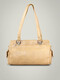

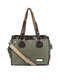

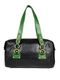

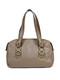

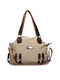

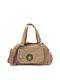

In [102]:
for fileimage in indices[0]:
  temp_img = cv2.imread(filenames[fileimage])
  cv2_imshow(temp_img)